<a href="https://colab.research.google.com/github/deejay14/Jhakas-NewsWala/blob/main/click_stream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('gdrive/My Drive/final_fixed_scrapped.csv')

In [ ]:
df

,Unnamed: 0,Title,Article,totalwords
0,0,Rs 400-cr ‘bungling’ by Amar Singh: HC seeks E...,The Allahabad High Court has directed the Enfo...,341
1,1,J&K HC orders FIR against teacher who fails to...,The J&K High Court on Friday asked a teacher t...,335
2,2,Crime in Cyberia: an incomplete list of offenders,An unknown Indian hacker has been charged with...,382
3,3,450 cannabis plants found on govt land in Mundhwa,The interrogation of two marijuana peddlers ab...,372
4,4,"Nagaland: 9 bullet-riddled bodies found,Karbi-...",Nine highly decomposed bodies were found stack...,449
...,...,...,...,...
7838,7838,"13 dead, one million evacuated in China after ...",At least 18 people were killed due to a landsl...,397
7839,7839,"Book Karnataka, Maharashtra CMs for culpable h...",With the flood situation in the state continui...,500
7840,7840,Romanian researcher develops disc-shaped flyin...,"Razan Sabie, an aerodynamicist who operates fr...",346
7841,7841,Is asteroid Apophis capable of triggering a ts...,It was around a few months back that Iain McDo...,412


In [ ]:
df.describe()

,Unnamed: 0,totalwords
count,7843.000000,7843.000000
mean,3921.000000,518.458116
std,2264.223414,443.567008
min,0.000000,100.000000
25%,1960.500000,285.000000
50%,3921.000000,389.000000
75%,5881.500000,595.000000
max,7842.000000,5884.000000


In [ ]:
##200 WPM

In [ ]:
list=df['totalwords'].tolist()

In [ ]:
time=[]
for i in range(7843):
  time.append(int(60*(list[i]/200)))


In [ ]:
df['average_reading_time(sec)']=time

In [ ]:
df.describe()

,Unnamed: 0,totalwords,average_reading_time(sec)
count,7843.000000,7843.000000,7843.000000
mean,3921.000000,518.458116,155.086829
std,2264.223414,443.567008,133.070188
min,0.000000,100.000000,30.000000
25%,1960.500000,285.000000,85.000000
50%,3921.000000,389.000000,116.000000
75%,5881.500000,595.000000,178.000000
max,7842.000000,5884.000000,1765.000000


In [ ]:
counts=df['average_reading_time(sec)'].value_counts()

In [ ]:
counts

96      100
99       92
87       83
90       79
102      77
       ... 
365       1
353       1
329       1
325       1
1695      1
Name: average_reading_time(sec), Length: 619, dtype: int64

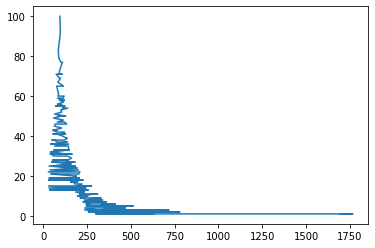

In [ ]:
ax=counts.plot()

In [ ]:
l=ax.get_lines()[0].get_xydata()

In [ ]:
l.astype(int)

array([[  96,  100],
       [  99,   92],
       [  87,   83],
       ...,
       [ 329,    1],
       [ 325,    1],
       [1695,    1]])

In [ ]:
x_data=l[:,0]
y_data=l[:,1]


In [ ]:
#x_data.astype(int)
#y_data.astype(int)


In [ ]:
x_data=x_data.reshape(-1, 1)

In [ ]:
import pandas as pd
data = l

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
model=gmm.fit(data)

In [ ]:
Xnew, Ynew = model.sample(10000)  # if Ynew is valuable


In [ ]:
np.var(Xnew[:,0])

80181.13657924527

In [ ]:
Xnew

array([[394.52738614,   4.45151915],
       [396.02185865,   4.96200708],
       [369.91662478,   4.45716559],
       ...,
       [561.26762032,   1.99761628],
       [417.54270634,   1.99974037],
       [581.55126212,   1.99903845]])

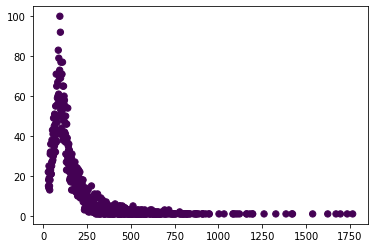

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=1).fit(l)
labels = gmm.predict(l)
plt.scatter(l[:, 0], l[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
probs = gmm.predict_proba(l)
np.shape(probs)

(619, 4)

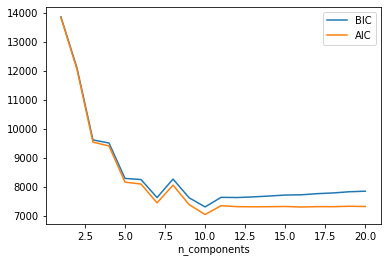

In [ ]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(l)
          for n in n_components]

plt.plot(n_components, [m.bic(l) for m in models], label='BIC')
plt.plot(n_components, [m.aic(l) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');